# 概述

[House Prices - Advanced Regression Techniques](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview)

這份房價資料集是由 Dean De Cock 編制，79 個特徵（幾乎）描述愛荷華州艾姆斯(Ames, Iowa)住宅資訊。<br>
我們的目標是**根據房屋特徵來預測房屋的最終價格**。

# 載入套件

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# 載入資料集

In [2]:
# 讀取訓練資料集和測試資料集
train_data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/test.csv')

print('訓練資料集和測試資料集成功!\n')
print(f'訓練資料集: {train_data.shape[0]} rows, {train_data.shape[1]} columns')
print(f'測試資料集: {test_data.shape[0]} rows, {test_data.shape[1]} columns')

訓練資料集和測試資料集成功!

訓練資料集: 1460 rows, 81 columns
測試資料集: 1459 rows, 80 columns


In [3]:
all_data = pd.concat([train_data, test_data]).reset_index(drop=True)

print(f'合併資料集: {all_data.shape[0]} rows, {all_data.shape[1]} columns')
print(f"SalePrice NaN 數量(測試資料集數量): {all_data['SalePrice'].isnull().sum()}")

合併資料集: 2919 rows, 81 columns
SalePrice NaN 數量(測試資料集數量): 1459


# 資料基本訊息

[data_description.txt](https://www.kaggle.com/c/home-data-for-ml-course/data?select=data_description.txt)

In [4]:
# 查看資料的基本訊息
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# 資料欄位說明


|#|Column|說明||
|-|-|-|-|
|0|Id|Building ID|唯一標識符|
|1|MSSubClass|Identifies the type of dwelling involved in the sale.|建築分類|
|2|MSZoning|Identifies the general zoning classification of the sale.|分區類別|
|3|LotFrontage|Linear feet of street connected to property.|街道長度（英尺）|
|4|LotArea|Lot size in square feet.|土地面積（平方英尺）|
|5|Street|Type of road access to property.|街道類型|
|6|Alley|Type of alley access to property.|巷道類型|
|7|LotShape|General shape of property.|土地形狀|
|8|LandContour|Flatness of the property.|房屋平坦度|
|9|Utilities|Type of utilities available.|公共設施|
|10|LotConfig|Lot configuration.|土地配置|
|11|LandSlope|Slope of property.|房屋坡度|
|12|Neighborhood|Physical locations within Ames city limits.|鄰里位置|
|13|Condition1|Proximity to various conditions.|鄰近條件1|
|14|Condition2|Proximity to various conditions.|鄰近條件2|
|15|BldgType|Type of dwelling.|建築類型|
|16|HouseStyle|Style of dwelling.|建築風格|
|17|OverallQual|Rates the overall material and finish of the house.|房屋整體質量評分|
|18|OverallCond|Rates the overall condition of the house.|房屋整體狀況評分|
|19|YearBuilt|Original construction date.|建造年份|
|20|YearRemodAdd|Remodel date (same as construction date if no remodeling or additions).|翻修年份|
|21|RoofStyle|Type of roof.|屋頂樣式|
|22|RoofMatl|Roof material.|屋頂材料|
|23|Exterior1st|Exterior covering on house.|外部覆蓋材料1|
|24|Exterior2nd|Exterior covering on house.|外部覆蓋材料2|
|25|MasVnrType|Masonry veneer type.|磚石飾面類型|
|26|MasVnrArea|Masonry veneer area in square feet.|磚石飾面面積（平方英尺）|
|27|ExterQual|Evaluates the quality of the material on the exterior.|外部材料質量評分|
|28|ExterCond|Evaluates the present condition of the material on the exterior.|外部材料現狀評分|
|29|Foundation|Type of foundation.|地基類型|
|30|BsmtQual|Evaluates the height of the basement.|地下室高度評分|
|31|BsmtCond|Evaluates the general condition of the basement.|地下室狀況評分|
|32|BsmtExposure|Refers to walkout or garden level walls.|地下室曝光程度|
|33|BsmtFinType1|Rating of basement finished area.|地下室完成類型1|
|34|BsmtFinSF1|Type 1 finished square feet.|地下室完成面積1（平方英尺）|
|35|BsmtFinType2|Rating of basement finished area.|地下室完成類型2|
|36|BsmtFinSF2|Type 2 finished square feet.|地下室完成面積2（平方英尺）|
|37|BsmtUnfSF|Unfinished square feet of basement area.|地下室未完成面積（平方英尺）|
|38|TotalBsmtSF|Total square feet of basement area.|地下室總面積（平方英尺）|
|39|Heating|Type of heating.|供暖類型|
|40|HeatingQC|Heating quality and condition.|供暖質量和狀況評分|
|41|CentralAir|Central air conditioning.|中央空調|
|42|Electrical|Electrical system.|電氣系統|
|43|1stFlrSF|First Floor square feet.|一樓面積（平方英尺）|
|44|2ndFlrSF|Second floor square feet.|二樓面積（平方英尺）|
|45|LowQualFinSF|Low quality finished square feet (all floors).|低質量完成面積（平方英尺）|
|46|GrLivArea|Above grade (ground) living area square feet.|地上居住面積（平方英尺）|
|47|BsmtFullBath|Basement full bathrooms.|地下室全浴室|
|48|BsmtHalfBath|Basement half bathrooms.|地下室半浴室|
|49|FullBath|Full bathrooms above grade.|地上全浴室|
|50|HalfBath|Half baths above grade.|地上半浴室|
|51|BedroomAbvGr|Bedrooms above grade (does NOT include basement bedrooms).|地上臥室數（不包括地下室臥室）|
|52|KitchenAbvGr|Kitchens above grade.|地上廚房數|
|53|KitchenQual|Kitchen quality.|廚房質量評分|
|54|TotRmsAbvGrd|Total rooms above grade (does not include bathrooms).|地上總房間數（不包括浴室）|
|55|Functional|Home functionality (Assume typical unless deductions are warranted).|房屋功能狀況|
|56|Fireplaces|Number of fireplaces.|壁爐數量|
|57|FireplaceQu|Fireplace quality.|壁爐質量評分|
|58|GarageType|Garage location.|車庫類型|
|59|GarageYrBlt|Year garage was built.|車庫建造年份|
|60|GarageFinish|Interior finish of the garage.|車庫內部完工|
|61|GarageCars|Size of garage in car capacity.|車庫容量（以車位數計）|
|62|GarageArea|Size of garage in square feet.|車庫面積（平方英尺）|
|63|GarageQual|Garage quality.|車庫質量評分|
|64|GarageCond|Garage condition.|車庫狀況評分|
|65|PavedDrive|Paved driveway.|鋪設的車道|
|66|WoodDeckSF|Wood deck area in square feet.|木製露台面積（平方英尺）|
|67|OpenPorchSF|Open porch area in square feet.|開放式門廊面積（平方英尺）|
|68|EnclosedPorch|Enclosed porch area in square feet.|封閉式門廊面積（平方英尺）|
|69|3SsnPorch|Three season porch area in square feet.|三季門廊面積（平方英尺）|
|70|ScreenPorch|Screen porch area in square feet.|紗門廊面積（平方英尺）|
|71|PoolArea|Pool area in square feet.|泳池面積（平方英尺）|
|72|PoolQC|Pool quality.|泳池質量評分|
|73|Fence|Fence quality.|圍欄質量|
|74|MiscFeature|Miscellaneous feature not covered in other categories.|其他特徵|
|75|MiscVal|$Value of miscellaneous feature.|其他特徵的價值（美元）|
|76|MoSold|Month Sold (MM).|銷售月份|
|77|YrSold|Year Sold (YYYY).|銷售年份|
|78|SaleType|Type of sale.|銷售類型|
|79|SaleCondition|Condition of sale.|銷售條件|
|80|SalePrice|The property's sale price in dollars. This is the target variable that you're trying to predict.|銷售價格|

# 資料欄位字典

In [5]:
column_chinese_dict = {
    "Id": "唯一標識符",
    "MSSubClass": "建築分類",
    "MSZoning": "分區類別",
    "LotFrontage": "街道長度（英尺）",
    "LotArea": "土地面積（平方英尺）",
    "Street": "街道類型",
    "Alley": "巷道類型",
    "LotShape": "土地形狀",
    "LandContour": "房屋平坦度",
    "Utilities": "公共設施",
    "LotConfig": "土地配置",
    "LandSlope": "房屋坡度",
    "Neighborhood": "鄰里位置",
    "Condition1": "鄰近條件1",
    "Condition2": "鄰近條件2",
    "BldgType": "建築類型",
    "HouseStyle": "建築風格",
    "OverallQual": "房屋整體質量評分",
    "OverallCond": "房屋整體狀況評分",
    "YearBuilt": "建造年份",
    "YearRemodAdd": "翻修年份",
    "RoofStyle": "屋頂樣式",
    "RoofMatl": "屋頂材料",
    "Exterior1st": "外部覆蓋材料1",
    "Exterior2nd": "外部覆蓋材料2",
    "MasVnrType": "磚石飾面類型",
    "MasVnrArea": "磚石飾面面積（平方英尺）",
    "ExterQual": "外部材料質量評分",
    "ExterCond": "外部材料現狀評分",
    "Foundation": "地基類型",
    "BsmtQual": "地下室高度評分",
    "BsmtCond": "地下室狀況評分",
    "BsmtExposure": "地下室曝光程度",
    "BsmtFinType1": "地下室完成類型1",
    "BsmtFinSF1": "地下室完成面積1（平方英尺）",
    "BsmtFinType2": "地下室完成類型2",
    "BsmtFinSF2": "地下室完成面積2（平方英尺）",
    "BsmtUnfSF": "地下室未完成面積（平方英尺）",
    "TotalBsmtSF": "地下室總面積（平方英尺）",
    "Heating": "供暖類型",
    "HeatingQC": "供暖質量和狀況評分",
    "CentralAir": "中央空調",
    "Electrical": "電氣系統",
    "1stFlrSF": "一樓面積（平方英尺）",
    "2ndFlrSF": "二樓面積（平方英尺）",
    "LowQualFinSF": "低質量完成面積（平方英尺）",
    "GrLivArea": "地上居住面積（平方英尺）",
    "BsmtFullBath": "地下室全浴室",
    "BsmtHalfBath": "地下室半浴室",
    "FullBath": "地上全浴室",
    "HalfBath": "地上半浴室",
    "BedroomAbvGr": "地上臥室數（不包括地下室臥室）",
    "KitchenAbvGr": "地上廚房數",
    "KitchenQual": "廚房質量評分",
    "TotRmsAbvGrd": "地上總房間數（不包括浴室）",
    "Functional": "房屋功能狀況",
    "Fireplaces": "壁爐數量",
    "FireplaceQu": "壁爐質量評分",
    "GarageType": "車庫類型",
    "GarageYrBlt": "車庫建造年份",
    "GarageFinish": "車庫內部完工",
    "GarageCars": "車庫容量（以車位數計）",
    "GarageArea": "車庫面積（平方英尺）",
    "GarageQual": "車庫質量評分",
    "GarageCond": "車庫狀況評分",
    "PavedDrive": "鋪設的車道",
    "WoodDeckSF": "木製露台面積（平方英尺）",
    "OpenPorchSF": "開放式門廊面積（平方英尺）",
    "EnclosedPorch": "封閉式門廊面積（平方英尺）",
    "3SsnPorch": "三季門廊面積（平方英尺）",
    "ScreenPorch": "紗門廊面積（平方英尺）",
    "PoolArea": "泳池面積（平方英尺）",
    "PoolQC": "泳池質量評分",
    "Fence": "圍欄質量",
    "MiscFeature": "其他特徵",
    "MiscVal": "其他特徵的價值（美元）",
    "MoSold": "銷售月份",
    "YrSold": "銷售年份",
    "SaleType": "銷售類型",
    "SaleCondition": "銷售條件",
    "SalePrice": "銷售價格",

    # 1Hot編碼後的特徵
    "MSZoning_FV": "分區類別（漂浮村莊住宅）",
    "MSZoning_RL": "分區類別（住宅低密度）",
    "MSZoning_RH": "分區類別（住宅高密度）",
    "MSZoning_RM": "分區類別（住宅中密度）",
    "Street_Grvl": "街道類型（碎石）",
    "Street_Pave": "街道類型（鋪設）",
    "Alley_Grvl": "巷道類型（碎石）",
    "Alley_Pave": "巷道類型（鋪設）",
    "Alley_None": "巷道類型（無巷道）",
    "LotShape_Reg": "土地形狀（規則）",
    "LotShape_IR1": "土地形狀（稍不規則）",
    "LotShape_IR2": "土地形狀（中度不規則）",
    "LotShape_IR3": "土地形狀（非常不規則）",
    "LandContour_Lvl": "房屋平坦度（平坦）",
    "LandContour_Bnk": "房屋平坦度（銀行）",
    "LandContour_HLS": "房屋平坦度（山坡）",
    "LandContour_Low": "房屋平坦度（低地）",
    "Utilities_AllPub": "公共設施（所有公共設施）",
    "Utilities_NoSewr": "公共設施（無下水道）",
    "Utilities_NoSeWa": "公共設施（無下水道和水）",
    "Utilities_ELO": "公共設施（僅電力）",
    "LotConfig_Inside": "土地配置（內側）",
    "LotConfig_Corner": "土地配置（角落）",
    "LotConfig_CulDSac": "土地配置（死胡同）",
    "LotConfig_FR2": "土地配置（兩側臨街）",
    "LotConfig_FR3": "土地配置（三側臨街）",
    "LandSlope_Gtl": "房屋坡度（緩坡）",
    "LandSlope_Mod": "房屋坡度（中度坡）",
    "LandSlope_Sev": "房屋坡度（陡坡）",
    "Neighborhood_Blmngtn": "鄰里位置（布盧明頓高地）",
    "Neighborhood_Blueste": "鄰里位置（藍牧草）",
    "Neighborhood_BrDale": "鄰里位置（布雷亞代爾）",
    "Neighborhood_BrkSide": "鄰里位置（布魯克賽德）",
    "Neighborhood_ClearCr": "鄰里位置（清溪）",
    "Neighborhood_CollgCr": "鄰里位置（學院溪）",
    "Neighborhood_Crawfor": "鄰里位置（克勞福德）",
    "Neighborhood_Edwards": "鄰里位置（愛德華茲）",
    "Neighborhood_Gilbert": "鄰里位置（吉爾伯特）",
    "Neighborhood_IDOTRR": "鄰里位置（愛荷華州DOT鐵路）",
    "Neighborhood_MeadowV": "鄰里位置（草甸村）",
    "Neighborhood_Mitchel": "鄰里位置（米切爾）",
    "Neighborhood_Names": "鄰里位置（北艾姆斯）",
    "Neighborhood_NoRidge": "鄰里位置（北山脊）",
    "Neighborhood_NPkVill": "鄰里位置（北公園別墅）",
    "Neighborhood_NridgHt": "鄰里位置（北山脊高地）",
    "Neighborhood_NWAmes": "鄰里位置（西北艾姆斯）",
    "Neighborhood_OldTown": "鄰里位置（舊城區）",
    "Neighborhood_SWISU": "鄰里位置（愛荷華州立大學西南）",
    "Neighborhood_Sawyer": "鄰里位置（索耶）",
    "Neighborhood_SawyerW": "鄰里位置（索耶西）",
    "Neighborhood_Somerset": "鄰里位置（薩默塞特）",
    "Neighborhood_StoneBr": "鄰里位置（石溪）",
    "Neighborhood_Timber": "鄰里位置（林地）",
    "Neighborhood_Veenker": "鄰里位置（芬克）",
    "Condition1_Artery": "鄰近條件1（主幹道）",
    "Condition1_Feedr": "鄰近條件1（給料道）",
    "Condition1_Norm": "鄰近條件1（正常）",
    "Condition1_RRNn": "鄰近條件1（北南鐵路）",
    "Condition1_RRAn": "鄰近條件1（北南鐵路旁）",
    "Condition1_PosN": "鄰近條件1（靠近公園等）",
    "Condition1_PosA": "鄰近條件1（毗鄰公園等）",
    "Condition1_RRNe": "鄰近條件1（東西鐵路）",
    "Condition1_RRAe": "鄰近條件1（東西鐵路旁）",
    "BldgType_1Fam": "建築類型（獨立單戶住宅）",
    "BldgType_2fmCon": "建築類型（雙戶轉換）",
    "BldgType_Duplex": "建築類型（雙工）",
    "BldgType_TwnhsE": "建築類型（聯排別墅端部）",
    "BldgType_TwnhsI": "建築類型（聯排別墅內部）",
    "HouseStyle_1Story": "建築風格（一層）",
    "HouseStyle_1.5Fin": "建築風格（一層半-完成）",
    "HouseStyle_1.5Unf": "建築風格（一層半-未完成）",
    "HouseStyle_2Story": "建築風格（二層）",
    "HouseStyle_2.5Fin": "建築風格（二層半-完成）",
    "HouseStyle_2.5Unf": "建築風格（二層半-未完成）",
    "HouseStyle_SFoyer": "建築風格（分層門廳）",
    "HouseStyle_SLvl": "建築風格（分層）",
    "OverallQual_10": "房屋整體質量評分（非常優秀）",
    "OverallQual_9": "房屋整體質量評分（優秀）",
    "OverallQual_8": "房屋整體質量評分（非常好）",
    "OverallQual_7": "房屋整體質量評分（好）",
    "OverallQual_6": "房屋整體質量評分（高於平均水平）",
    "OverallQual_5": "房屋整體質量評分（平均水平）",
    "OverallQual_4": "房屋整體質量評分（低於平均水平）",
    "OverallQual_3": "房屋整體質量評分（一般）",
    "OverallQual_2": "房屋整體質量評分（差）",
    "OverallQual_1": "房屋整體質量評分（非常差）",
    "OverallCond_10": "房屋整體狀況評分（非常優秀）",
    "OverallCond_9": "房屋整體狀況評分（優秀）",
    "OverallCond_8": "房屋整體狀況評分（非常好）",
    "OverallCond_7": "房屋整體狀況評分（好）",
    "OverallCond_6": "房屋整體狀況評分（高於平均水平）",
    "OverallCond_5": "房屋整體狀況評分（平均水平）",
    "OverallCond_4": "房屋整體狀況評分（低於平均水平）",
    "OverallCond_3": "房屋整體狀況評分（一般）",
    "OverallCond_2": "房屋整體狀況評分（差）",
    "OverallCond_1": "房屋整體狀況評分（非常差）",
    "ExterQual_Ex": "外部材料質量評分（優秀）",
    "ExterQual_Gd": "外部材料質量評分（良好）",
    "ExterQual_TA": "外部材料質量評分（典型）",
    "ExterQual_Fa": "外部材料質量評分（一般）",
    "ExterCond_Ex": "外部材料現狀評分（優秀）",
    "ExterCond_Gd": "外部材料現狀評分（良好）",
    "ExterCond_TA": "外部材料現狀評分（典型）",
    "ExterCond_Fa": "外部材料現狀評分（一般）",
    "Foundation_PConc": "地基類型（澆築混凝土）",
    "Foundation_CBlock": "地基類型（磚塊）",
    "Foundation_BrkTil": "地基類型（磚塊瓷磚）",
    "Foundation_Wood": "地基類型（木材）",
    "Foundation_Slab": "地基類型（板）",
    "BsmtQual_Ex": "地下室高度評分（優秀）",
    "BsmtQual_Gd": "地下室高度評分（良好）",
    "BsmtQual_TA": "地下室高度評分（典型）",
    "BsmtQual_Fa": "地下室高度評分（一般）",
    "BsmtQual_None": "地下室高度評分（無地下室）",
    "BsmtCond_Ex": "地下室狀況評分（優秀）",
    "BsmtCond_Gd": "地下室狀況評分（良好）",
    "BsmtCond_TA": "地下室狀況評分（典型）",
    "BsmtCond_Fa": "地下室狀況評分（一般）",
    "BsmtCond_None": "地下室狀況評分（無地下室）",
    "BsmtExposure_Gd": "地下室曝光程度（良好）",
    "BsmtExposure_Av": "地下室曝光程度（平均）",
    "BsmtExposure_Mn": "地下室曝光程度（最小）",
    "BsmtExposure_No": "地下室曝光程度（無）",
    "BsmtExposure_None": "地下室曝光程度（無地下室）",
    "BsmtFinType1_GLQ": "地下室完成類型1（良好生活區）",
    "BsmtFinType1_ALQ": "地下室完成類型1（平均生活區）",
    "BsmtFinType1_BLQ": "地下室完成類型1（低於平均生活區）",
    "BsmtFinType1_Rec": "地下室完成類型1（娛樂室）",
    "BsmtFinType1_LwQ": "地下室完成類型1（低質量）",
    "BsmtFinType1_Unf": "地下室完成類型1（未完成）",
    "BsmtFinType1_None": "地下室完成類型1（無地下室）",
    "BsmtFinType2_GLQ": "地下室完成類型2（良好生活區）",
    "BsmtFinType2_ALQ": "地下室完成類型2（平均生活區）",
    "BsmtFinType2_BLQ": "地下室完成類型2（低於平均生活區）",
    "BsmtFinType2_Rec": "地下室完成類型2（娛樂室）",
    "BsmtFinType2_LwQ": "地下室完成類型2（低質量）",
    "BsmtFinType2_Unf": "地下室完成類型2（未完成）",
    "BsmtFinType2_None": "地下室完成類型2（無地下室）",
    "HeatingQC_Ex": "供暖質量和狀況評分（優秀）",
    "HeatingQC_Gd": "供暖質量和狀況評分（良好）",
    "HeatingQC_TA": "供暖質量和狀況評分（典型）",
    "HeatingQC_Fa": "供暖質量和狀況評分（一般）",
    "CentralAir_Y": "中央空調（有）",
    "CentralAir_N": "中央空調（無）",
    "Electrical_SBrkr": "電氣系統（標準斷路器和羅姆克斯）",
    "Electrical_FuseA": "電氣系統（60 AMP 保險絲盒）",
    "Electrical_FuseF": "電氣系統（60 AMP 保險絲盒和羅姆克斯）",
    "Electrical_FuseP": "電氣系統（60 AMP 保險絲盒和旋鈕管）",
    "Electrical_Mix": "電氣系統（混合）",
    "Functional_Typ": "房屋功能狀況（典型）",
    "Functional_Min1": "房屋功能狀況（小幅減少）",
    "Functional_Min2": "房屋功能狀況（中幅減少）",
    "Functional_Mod": "房屋功能狀況（大幅減少）",
    "Functional_Maj1": "房屋功能狀況（重大減少1）",
    "Functional_Maj2": "房屋功能狀況（重大減少2）",
    "Functional_Sev": "房屋功能狀況（嚴重受損）",
    "Functional_Sal": "房屋功能狀況（僅限回收）",
    "FireplaceQu_Ex": "壁爐質量評分（優秀）",
    "FireplaceQu_Gd": "壁爐質量評分（良好）",
    "FireplaceQu_TA": "壁爐質量評分（典型）",
    "FireplaceQu_Fa": "壁爐質量評分（一般）",
    "FireplaceQu_Po": "壁爐質量評分（差）",
    "FireplaceQu_None": "壁爐質量評分（無壁爐）",
    "GarageType_2Types": "車庫類型（多類型）",
    "GarageType_Attchd": "車庫類型（附屬）",
    "GarageType_Basment": "車庫類型（地下室）",
    "GarageType_BuiltIn": "車庫類型（內建）",
    "GarageType_CarPort": "車庫類型（車棚）",
    "GarageType_Detchd": "車庫類型（獨立）",
    "GarageType_None": "車庫類型（無車庫）",
    "GarageFinish_Fin": "車庫內部完工（完成）",
    "GarageFinish_RFn": "車庫內部完工（粗略完成）",
    "GarageFinish_Unf": "車庫內部完工（未完成）",
    "GarageFinish_None": "車庫內部完工（無車庫）",
    "GarageQual_Ex": "車庫質量評分（優秀）",
    "GarageQual_Gd": "車庫質量評分（良好）",
    "GarageQual_TA": "車庫質量評分（典型）",
    "GarageQual_Fa": "車庫質量評分（一般）",
    "GarageQual_Po": "車庫質量評分（差）",
    "GarageQual_None": "車庫質量評分（無車庫）",
    "GarageCond_Ex": "車庫狀況評分（優秀）",
    "GarageCond_Gd": "車庫狀況評分（良好）",
    "GarageCond_TA": "車庫狀況評分（典型）",
    "GarageCond_Fa": "車庫狀況評分（一般）",
    "GarageCond_Po": "車庫狀況評分（差）",
    "GarageCond_None": "車庫狀況評分（無車庫）",
    "PavedDrive_Y": "鋪設的車道（是）",
    "PavedDrive_P": "鋪設的車道（部分鋪設）",
    "PavedDrive_N": "鋪設的車道（無鋪設）",
    "PoolQC_Ex": "泳池質量評分（優秀）",
    "PoolQC_Gd": "泳池質量評分（良好）",
    "PoolQC_TA": "泳池質量評分（典型）",
    "PoolQC_Fa": "泳池質量評分（一般）",
    "PoolQC_None": "泳池質量評分（無泳池）",
    "Fence_GdPrv": "圍欄質量（良好隱私）",
    "Fence_MnPrv": "圍欄質量（最小隱私）",
    "Fence_GdWo": "圍欄質量（良好木材）",
    "Fence_MnWw": "圍欄質量（最小木材）",
    "Fence_None": "圍欄質量（無圍欄）",
    "MiscFeature_TenC": "其他特徵（網球場）",
    "MiscFeature_Shed": "其他特徵（棚）",
    "MiscFeature_Gar2": "其他特徵（第二車庫）",
    "MiscFeature_Elev": "其他特徵（電梯）",
    "MiscFeature_None": "其他特徵（無）",
    "SaleType_WD": "銷售類型（一般擔保契約）",
    "SaleType_CWD": "銷售類型（現金擔保契約）",
    "SaleType_VWD": "銷售類型（VA貸款擔保契約）",
    "SaleType_New": "銷售類型（新建房屋）",
    "SaleType_COD": "銷售類型（法院指派契約/遺產）",
    "SaleType_Con": "銷售類型（合同-15%預付款）",
    "SaleType_ConLw": "銷售類型（合同-低首付低利率）",
    "SaleType_ConLI": "銷售類型（合同-低利率）",
    "SaleType_ConLD": "銷售類型（合同-低首付）",
    "SaleType_Oth": "銷售類型（其他）",
    "SaleCondition_Normal": "銷售條件（正常）",
    "SaleCondition_Abnorml": "銷售條件（不正常-例如止贖）",
    "SaleCondition_AdjLand": "銷售條件（毗鄰土地購買）",
    "SaleCondition_Alloca": "銷售條件（配置-兩個獨立產權）",
    "SaleCondition_Family": "銷售條件（家庭成員間的交易）",
    "SaleCondition_Partial": "銷售條件（房屋未完成時的銷售）"
}

# 檢查缺失值

In [6]:
# 檢查每個特徵的缺失值數量
missing_values = all_data.isnull().sum()

# 只選擇有缺失值的特徵
missing_features = missing_values[missing_values > 0]

# 顯示有缺失值的特徵數量
print(f'有 {len(missing_features)} 個特徵有缺失值')

# 創建一個空的DataFrame來儲存結果
missing_data_list = []

# 遍歷每個有缺失值的特徵，將信息存儲到列表中
for feature, count in missing_features.items():
    dtype = train_data[feature].dtype
    chinese_desc = column_chinese_dict.get(feature)
    missing_data_list.append({
        "特徵名": feature,
        "中文說明": chinese_desc,
        "缺失值數量": count,
        "Dtype": dtype
    })

# 將列表轉換為DataFrame
missing_df = pd.DataFrame(missing_data_list)

# 顯示缺失值的DataFrame
missing_df

有 35 個特徵有缺失值


,特徵名,中文說明,缺失值數量,Dtype
0,MSZoning,分區類別,4,object
1,LotFrontage,街道長度（英尺）,486,float64
2,Alley,巷道類型,2721,object
3,Utilities,公共設施,2,object
4,Exterior1st,外部覆蓋材料1,1,object
5,Exterior2nd,外部覆蓋材料2,1,object
6,MasVnrType,磚石飾面類型,1766,object
7,MasVnrArea,磚石飾面面積（平方英尺）,23,float64
8,BsmtQual,地下室高度評分,81,object
9,BsmtCond,地下室狀況評分,82,object


# 變數分佈

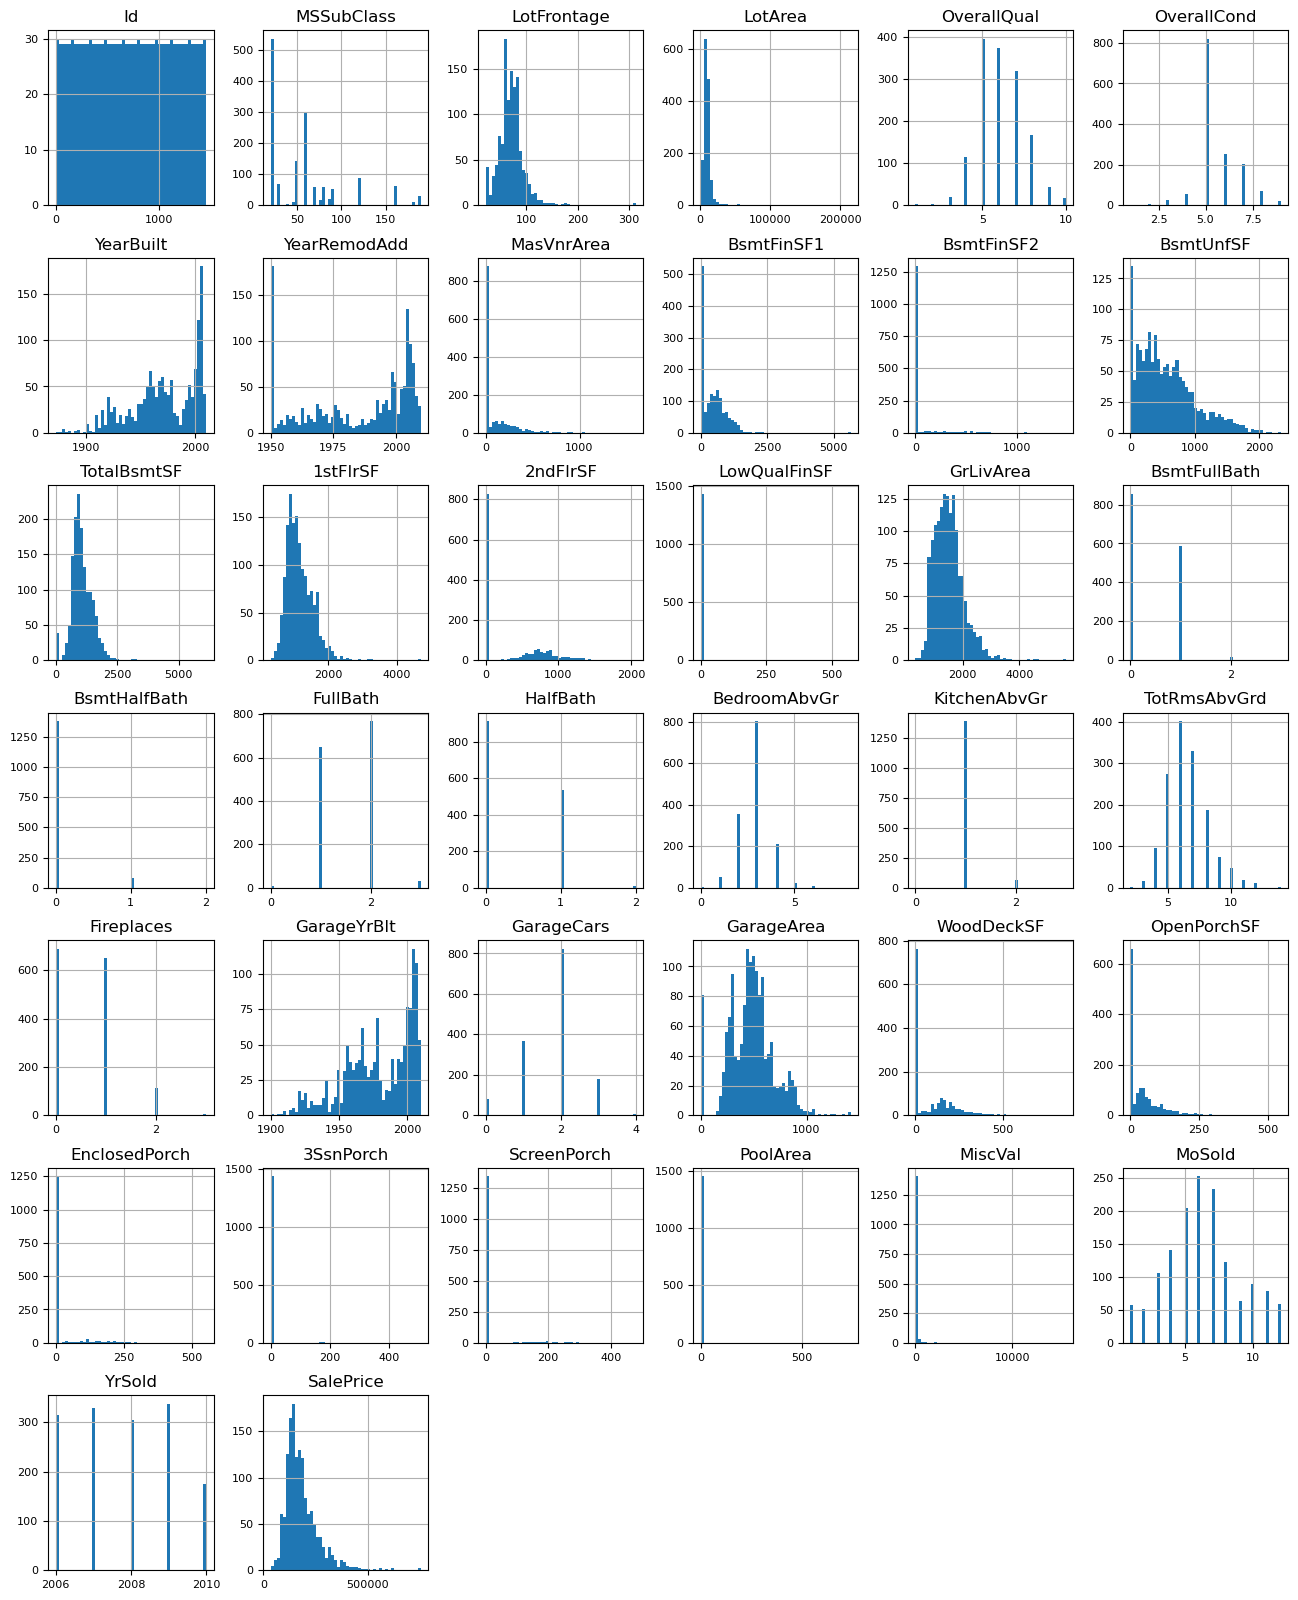

In [7]:
# 檢查數值型特徵的分佈
num_features = train_data.select_dtypes(include=['int64', 'float64']).columns
train_data[num_features].hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

目標變數 SalePrice 的直方圖中，可以看到資料大部分集中在較低的房價區域(10萬到30萬美元之間)，隨著房價的增加，資料的頻率逐漸減少，形成了一個長長的右尾巴，這正是右偏分佈的典型特徵。

- 右偏分佈(正偏態分佈)：長尾在右側，大部分數值較小（常見於房價資料）。
- 左偏分佈(負偏態分佈)：長尾在左側，大部分數值較大。

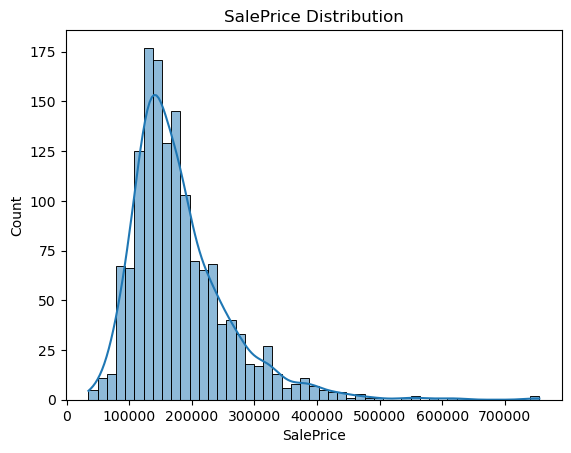

In [8]:
# 檢查目標變數的分佈
sns.histplot(train_data['SalePrice'], kde=True)
plt.title('SalePrice Distribution')
plt.show()

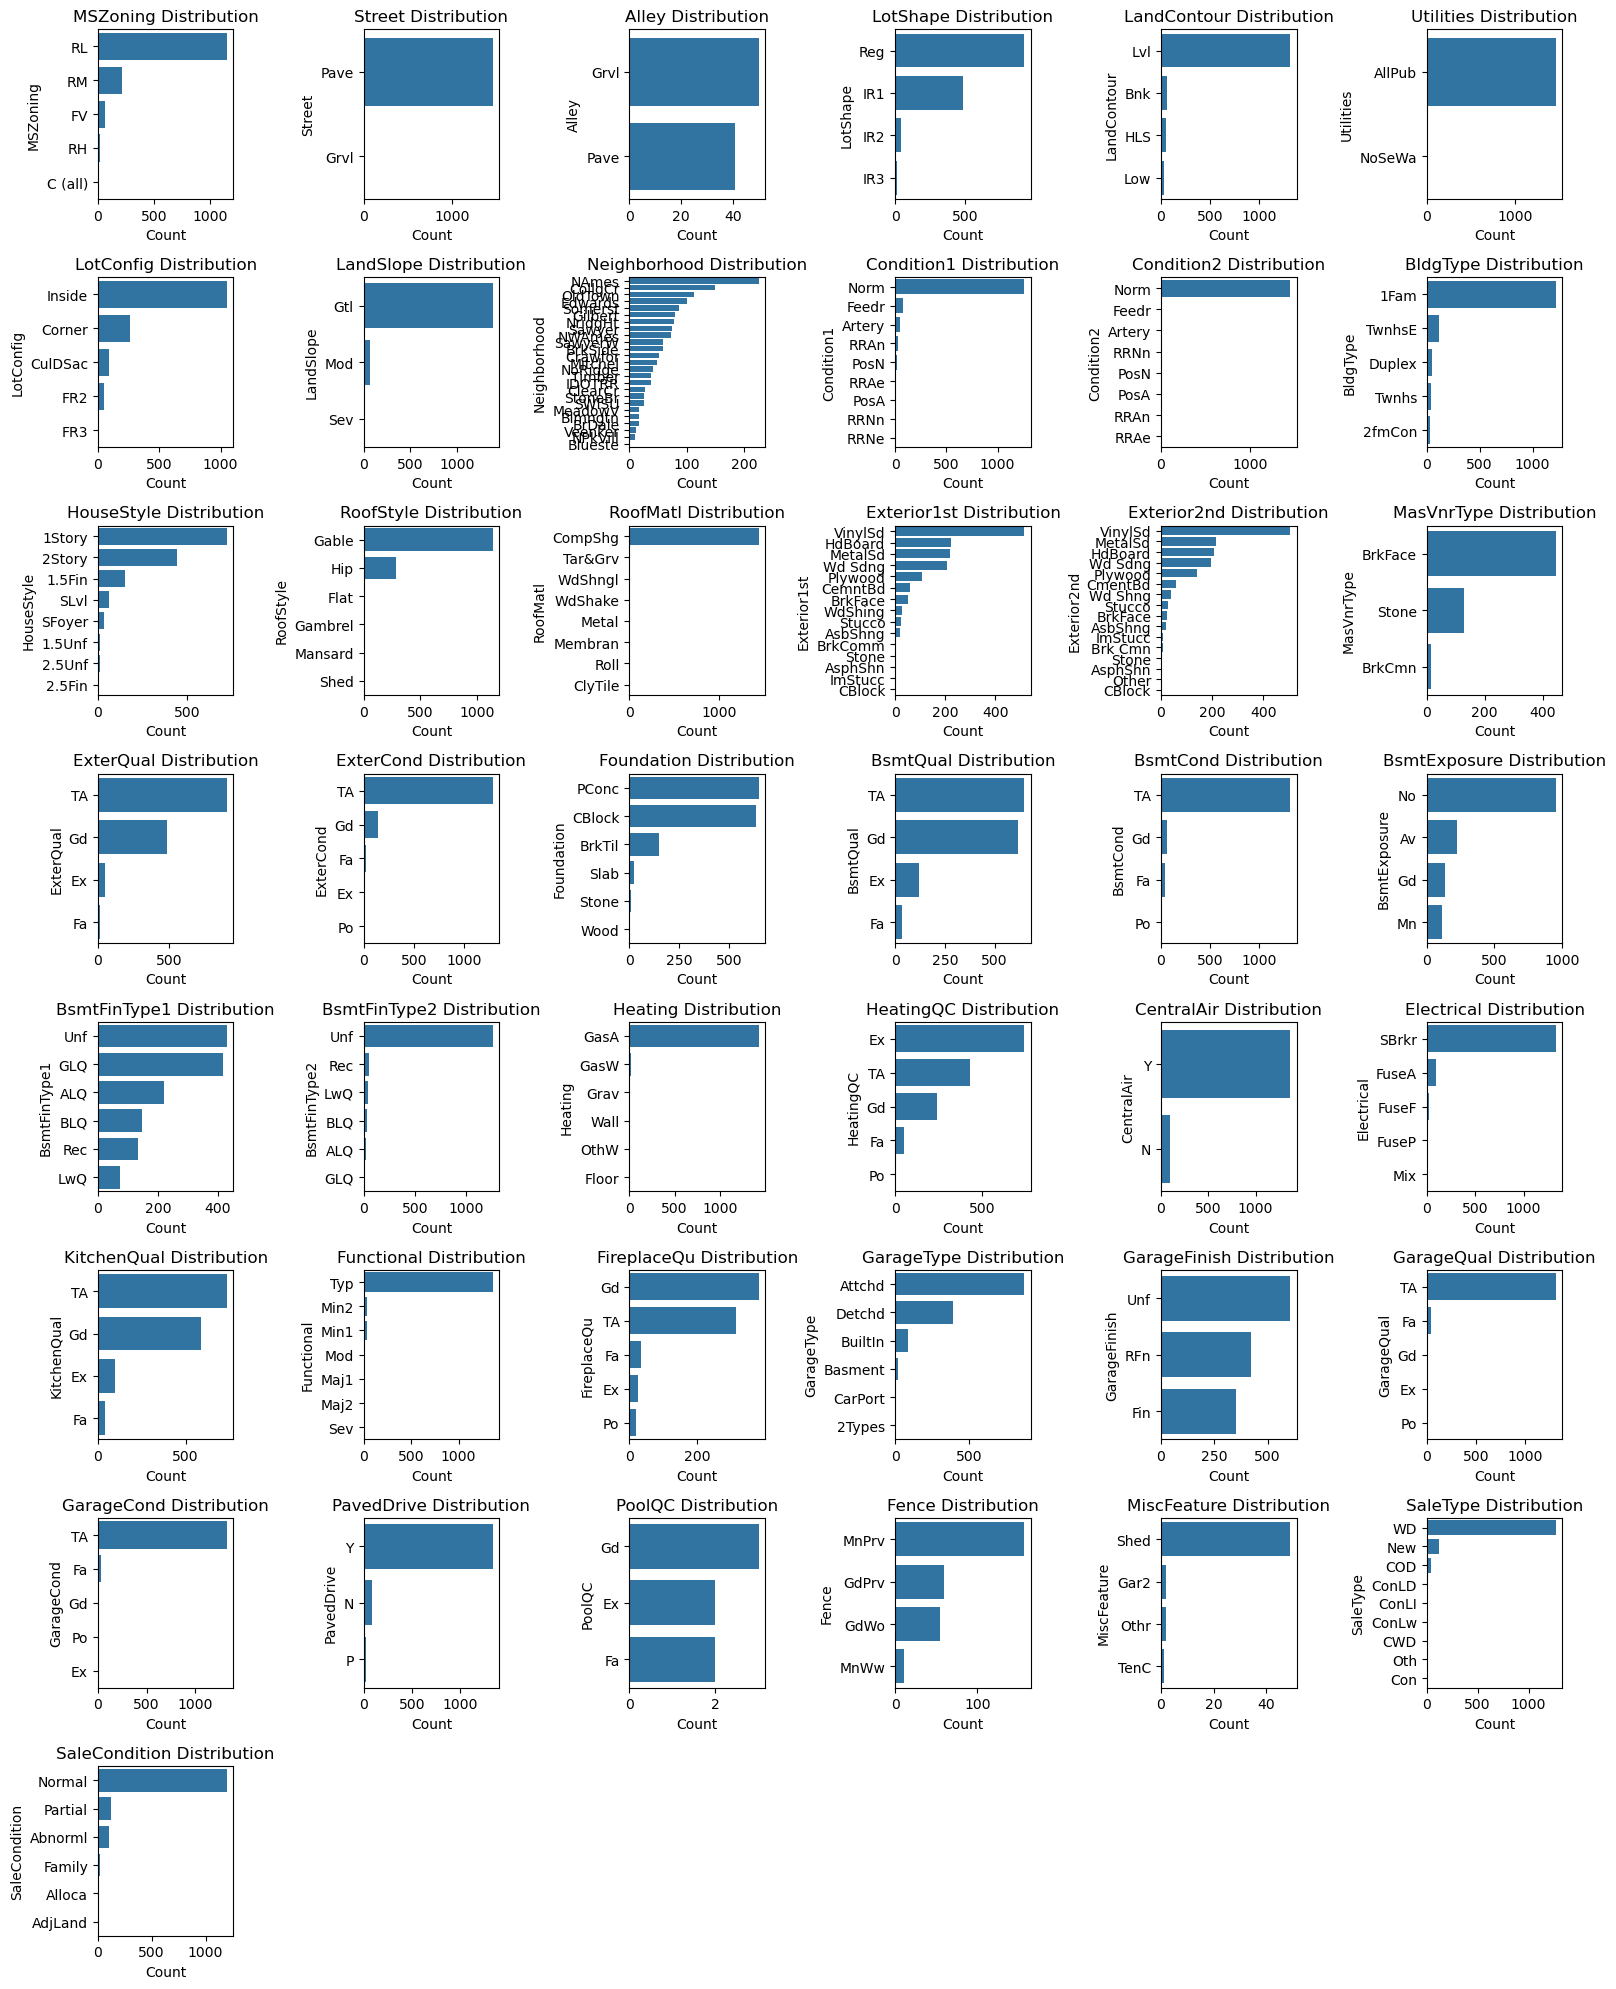

In [9]:
# 檢查類別型特徵的分佈
cat_features = train_data.select_dtypes(include=['object']).columns

num_cat_features = len(cat_features)
rows = (num_cat_features // 6) + 1
cols = 6

fig, axes = plt.subplots(rows, cols, figsize=(16, 20))
axes = axes.flatten()

for i, feature in enumerate(cat_features):
    sns.countplot(y=train_data[feature], order=train_data[feature].value_counts().index, ax=axes[i])
    axes[i].set_title(f'{feature} Distribution')
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel(feature)

# 刪除空白的子圖
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()